## Support vector machine

### Concept of margins

&emsp; Here we will consider a binary classification problem with labels $y\in\{-1,1\}$ and employ the following simple classification function

$g(z)=\left\{ 
\begin{array}{ll} 
+1,& z\geq 0 \\   
-1, & z<0
\end{array}\right. ,$

where having vector of features $x$ we introduce the notation $z(x)=w^T x + b$ with the vector of parameters $w$ and $b\in \mathbb{R}$. Thus we will consider the classifier $h_{w,b}(x)=g(w^T x + b)$.

&emsp; Let us first introduce a **functional margin** 

$\hat{\gamma}^{(i)}=(w^T x^{(i)} + b)y^{(i)}$, 


where $(x^{(i)}, y^{(i)})$ is a training example labeled by $i$. Note that together with $h_{w,b}(x^{(i)})$, the functional margin in some sense represents the confidence of our prediction. That is, when $y^{(i)}=+1$ and $w^T x^{(i)} + b\gg 0$ then $\hat{\gamma}^{(i)}\gg 0$ and at the same time we are deep in the $+1$ regime of our classifier $h_{w,b}(x)$. Similarly for $y^{(i)}=-1$ and $w^T x^{(i)} + b\ll 0$, $\hat{\gamma}^{(i)}\gg 0$ and $h_{w,b}(x^{(i)})=-1$. Nevertheless, while $h_{w,b}(x^{(i)})$ is unaffected when rescaling $(w, b) \rightarrow (\alpha w, \alpha b), \alpha\in \mathbb{R}_+$, the value of functional margin $\hat{\gamma}^{(i)}\rightarrow \alpha \hat{\gamma}^{(i)}$. Therefore, the functional margin can be arbitarily large. This issue can be overcome by *normalizing* $(w, b)\rightarrow (w/||w||, b/||w||)$. Such a normalized margin has a very neat geometrical interpretation that I briefly describe later. Now it is worth mentioning that for a given training set $S=\{(x^{(i)},y^{(i)}):i =1,2,\ldots,M_S\}$ one defines a function margin as

$\hat{\gamma}=\mathrm{min}_i \,\hat{\gamma}^{(i)}$.

&emsp; One may ask a smart question if there is some strict relation between the direction of $w$ vector and the decision boundary given by the equality $w^T x + b =0$. To find an answer we can consider two points characterized by vectors $x$ and $x'=x+\delta$ belonging to the decision boundary. Assume now that these points are very close so that locally the part of the decision boundary connecting them is a straight line along the vector $\delta$. Thus, due to relations $w^T x + b =0$ \& $w^T x' + b =0$ one finds

$w^T\delta =0$.

This result leads to the conclusion that the vector $w$ is always perpendicular to the decision boundary.

&emsp; Let us now consider a training sample $(x_A,y_A)$ with $x_A$ representing a point that does not belong to the decision boundary. The vector $x_A$ can be decomposed as follows $x_A=x_{db}+x_\perp$, where $w^T x_{db}+b=0$ and $x_\perp$ is perpendicular to the decision boundary in the point characterized by $x_{db}$. By computing the normalized functional margin at $x_A$ we find

$\gamma_A = \frac{y_A}{||w||}(w^T x_A +b)=\frac{y_A}{||w||}w^T x_\perp +\frac{y_A}{||w||}(w^T x_{db}+b)=\frac{y_A}{||w||}w^T x_\perp$.

Noting that $w \parallel x_\perp$ and that $w/||w||$ has a unit length one immediately recognizes $\gamma_A$ as a minimal distance between point $A$ and the decision boundary. Therefore the distance

$\gamma^{(i)}=\frac{y^{(i)}}{||w||}(w^T x^{(i)}+b)$,

is called the **geometric margin**. As before for the training set $S$ we will be interested in the smallest of the geometric margins

$\gamma=\mathrm{min}_i \gamma^{(i)}$.


### Lagrange duality

&emsp; Let us consider the followig optimization problem

$\mathrm{min}_w f(w) \quad$ s.t. $\quad g_{i=1,2,\ldots,k}(w)\leq 0 \quad \& \quad h_{i=1,2,\ldots,l}(w)=0$,

that will be called **primal**. Employing Lagrange multipliers method one can define

$\displaystyle{\mathcal{L}(w,\alpha, \beta) = f(w) +\sum_{i=1}^k \alpha_i g_i(w) +\sum_{i=1}^l \beta_i h_i(w)}$,

with $\alpha_i$ and $\beta_i$ Lagrange multipliers. Intoduce $\theta_P(w)=\max_{\beta,\alpha\,:\,\alpha\geq0}\mathcal{L}(w,\alpha, \beta)$ with the restriction that $\theta_P(w)=\infty$ if $ g_{i}(w)> 0$ or $h_{i}(w)\neq0$ for some $i$. On the other hand for $w$ satisfying primal constraints $\theta_P(w)=f(w)$. Thus, our minimization problem is equivalent to $\min_w \theta_P(w) = p^*$ where $p^*$ is the optimal value of the primal problem. Similarly we can introduce **dual** optimization problem by defining $\theta_D(\alpha,\beta)=\min_w \mathcal{L}(w,\alpha,\beta)$ where $\max_{\beta,\alpha\,:\,\alpha\geq0} \theta_D(\alpha,\beta) =d^*$ with $d^*$ being the optimal value for the dual optimization problem. Due to the fact that "max min" $\leq$ "min max" one immediately obtains $d^*\leq p^*$.

&emsp; If now $f$ and $g_i$'s are convex, $h_i$'s are affine ($h_i(w)=a_i^Tw+b_i$) and $\exists_w \forall_i \, : \, g_i(w)<0$, then there exist $w^*,\alpha^*,\beta^*$, where $w^*$ and $\{\alpha^*,\beta^*\}$ are solutions of primal and dual optimization problems, respectively. Additionaly, $p^*=d^*=\mathcal{L}(w^*,\alpha^*,\beta^*)$ and $w^*,\alpha^*,\beta^*$ satisfy Karush-Kuhn-Tucker (KKT) conditions [https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions]. Thus, we can solve the dual problem instead of the primal one.

### The optimal margin classifier

&emsp; We would like to determine a decision boundary for a given training set. For this purpose we would like to use the geometric margin separating the -1 and +1 training examples basing on the Euclidean distance. The original optimization problem 

$\max_{\gamma, w, b} \gamma \quad \text{s.t} \quad \forall_i \, : \, \gamma^{(i)}(w^T x^{(i)}+b)\geq \gamma \quad \& \quad ||w||=1$,

possesses a problematic (non-convex) constraint $||w||=1$ that we want to ged rid of. First, we can switch from the geometric to functional margin ($\gamma \rightarrow \hat{\gamma}$) and maximize $\hat{\gamma}/||w||$ instead of $\gamma$. Second, using the freedom of scaling  $(w, b) \rightarrow (\alpha w, \alpha b)$ one can impose the (scaling) constraint $\hat{\gamma}=1$ so that the problem reduces to

$\max_{ w, b} \frac{1}{||w||} \quad \text{s.t} \quad \forall_i \, : \, \gamma^{(i)}(w^T x^{(i)}+b)\geq 1.$

By noting that maximization of $1/||w||$ is equivalent to minimization of  $||w||^2$ we simplify the problem to the form

$\min_{ w, b} \frac{1}{2}||w||^2 \quad \text{s.t} \quad \forall_i \, : \, \gamma^{(i)}(w^T x^{(i)}+b)\geq 1,$

where we need to minimize convex quadratic function with linear constraints. This will be our *primal* problem with 

$g_i(w)=-y^{(i)}(w^T x^{(i)}+b)+1\leq 0,$

which is affine and then convex and $h_i(w)$ is identically 0. Thus, according to the previous discussion we should have $p^*=d^*$ and KKT conditions satisfied, where one of them reads $\alpha_i^* g_i(w^*)=0$ for $i=1,2,\ldots,k$. This, together with the constraint $g_i(w)\leq0$ means that the multipliers $\alpha_i^*>0$  only for the points $x^{(i)}$ corresponding to $g_i(w^*)=0 \Longrightarrow y^{(i)}(w^{*T} x^{(i)}+b)=1$, i.e. for the training examples with the smallest margins. These points are called **support vectors**. For other points (usually the vast majority of points) $\alpha_i^*=0$.

&emsp; Ok, let us massage our lagrangian 

$\mathcal{L}(w,b, \alpha)=\frac{1}{2}||w||^2-\sum_i \alpha_i [y^{(i)}(w^T x^{(i)}+b)-1]$,

where the dual problem requires minimization of $\mathcal{L}$ with respect to $w$ and $b$

$\nabla_w \mathcal{L}=0 \Longrightarrow w=\sum_{i}\alpha_i y^{(i)} x^{(i)} \qquad \& \qquad \partial_b \mathcal{L}=0 \Longrightarrow \sum_{i}\alpha_i y^{(i)}=0$,

which leads to the dual optimization problem in the form

$\max_{\alpha }\,  W(\alpha)=\sum_{i}\alpha - \frac{1}{2}\sum_{i,j}y^{(i)}y^{(j)}\alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle  \quad \text{s.t.} \quad  \forall_i \, : \, \alpha_i\geq 0 \quad \& \quad \sum_{i}\alpha_i y^{(i)}=0.$

Note that here we have the the inner product $\langle x^{(i)}, x^{(j)} \rangle =  [x^{(i)}]^T x^{(j)}$ that will be crucial for the formulation of the algorithm later. It is also worth noting that $w^T x+b = \sum_{i}\alpha_i y^{(i)}\langle x^{(i)}, x\rangle+b$ due to the equality $w=\sum_{i}\alpha^i y^{(i)} x^{(i)}$.

&emsp; If we determined the optimal $\alpha_i^*$'s then the original parameters can be found by the relations 

$w^*=\sum_{i}\alpha^{*}_i y^{(i)} x^{(i)} \qquad \& \qquad  b=-[\max_{i:y^{(i)}=-1}w^{*T}x^{(i)}+\min_{i:y^{(i)}=1}w^{*T}x^{(i)}]/2$,

where the second equality comes from the decision boundary constraint for support vectors, i.e. $y^{(i)}(w^{*T}x^{(i)}+b)=1 \stackrel{y^{(i)}=\pm1}\Longrightarrow (w^{*T}x^{(i)}+b)=y^{(i)}$.
So the closest negative ($y^{(i)}=-1$) and positive ($y^{(i)}=1$) examples correspond to $\max_{i:y^{(i)}=-1}w^{*T}x^{(i)} +b = -1  \,\, \& \,\,  \min_{i:y^{(i)}=1}w^{*T}x^{(i)}+b=1$. The result is found when adding both relations and determining $b$.

### Kernels

&emsp; Our reformulated problem depends now on the attributes vectors $x^{(i)}$ only through the inner products $\langle x^{(i)}, x^{(j)} \rangle$ measuring the similarity between $x^{(i)}$ and $x^{(j)}$. To incorporate higher dimensional dependencies between attributes one introduces some **feature mapping** $x\rightarrow \phi(x)$ replacing the inner products $\langle x, x' \rangle$ with $\langle \phi(x), \phi(x') \rangle = \phi(x)^T \phi(x')=K(x,x')$, where $K$ is called **kernel** and to some extend measures the similarity between $\phi(x)$ and $\phi(x')$. For example, $K(x,x')=(x^T x')^2=\sum_{i,j}(x_i x'_i)(x_j x_j')=\sum_{i,j}(x_i x_j)(x'_i x'_j)$, where $x_i x_j$ are elements of $\phi(x)$. In such a case if $\mathrm{len}(x) = n$ then computing elements of $\phi(x)$ requires $O(n^2)$ time, while determing $K(x,x')$ takes $O(n)$ only. More generally one can consider the kernel $K(x,x') = (x^T x'+b)^d$ which determination demands $O(n)$ time only.

&emsp; Given the intuition where $K(x,x')$ represents a measure of similarity between $\phi(x)$ and $\phi(x')$ and thus to some extend similarity between $x$ and $x'$ one can consider kernels being functions of $||x-x' ||$. The most natural choice would be $K(x,x')=\exp\left[-\frac{1}{2}||x-x'||^2/\sigma^2\right]$ (**Gaussian kernel**), which corresponds to an infinite dimensional feature mapping $\phi$.

&emsp; Introducing the kernel trick our high-dimensional decision boundary is given by 

$w^T x+b = \sum_{i}\alpha_i y^{(i)}\langle x^{(i)}, x\rangle+b =0 \stackrel{x\rightarrow \phi(x)}{\Longrightarrow} \sum_{i}\alpha_i y^{(i)}K(x^{(i)},x)+b =0, $

where now looking at the closest negative ($y^{(i)}=-1$) and positive ($y^{(i)}=1$) examples we have 

$\max_{i:y^{(i)}=-1}\sum_{j}\alpha_i y^{(j)}K(x^{(j)},x^{(i)})+b = -1  \,\, \& \,\,  \min_{i:y^{(i)}=1}\sum_{j}\alpha_i y^{(j)}K(x^{(j)},x^{(i)})+b=1$.

Therefore $b^*=-\frac{1}{2}\left[\max_{i:y^{(i)}=-1}\sum_{j}\alpha_i y^{(j)}K(x^{(j)},x^{(i)})+ \min_{i:y^{(i)}=1}\sum_{j}\alpha_i y^{(j)}K(x^{(j)},x^{(i)})\right]$.




&emsp; Let us consider set of $m$ points $\{x^{(1)},\ldots, x^{(m)}\}$ and the kernel matrix $\mathbb{K}_{ij}=K(x^{(i)},x^{(j)})=\phi(x^{(i)})^T \phi(x^{(j)})=\phi(x^{(j)})^T \phi(x^{(i)})$ where the symmetry relation $\mathbb{K}_{ij}=\mathbb{K}_{ji}$ is required for $K$ to be valid kernel (valid kernel: there exists some mapping $\phi$ corresponding to $K$). Now, for any $z$ one finds

$z^T \mathbb{K} z=\sum_{i,j}z_i \mathbb{K}_{ij} z_j = \sum_{i,j,k} z_i [\phi(x)]_k [\phi(x)]_k z_j = \sum_{k} \left(\sum_i[\phi(x)]_k z_i  \right)^2\geq 0,$

and thus $\mathbb{K}$ has to be positive semi-definite. According to *Mercer theorem*, for $K$ to be valid it is necessary and sufficient that $\mathbb{K}$ is symmetric and semi-definite.

### Regularization and nonseparable cases

Note that the decision boundary can change dramatically when we add even a single outlier. Therefore, one regularizes the algorithm making it less sensitive to outliers by allowing the scaled functional margin to be less than 1, i.e.,

$\min_{ w, b} \frac{1}{2}||w||^2+C\sum_{i}\xi_i \quad \text{s.t} \quad \forall_i \, : \, \gamma^{(i)}(w^T x^{(i)}+b)\geq 1-\xi_i \quad \& \quad \xi_i\geq1.$

In such a case our lagrangian reads ($\alpha_i, r_i\geq 0$)

$\mathcal{L}(w,b,\xi, \alpha,r)=\frac{1}{2}||w||^2+C\sum_{i}\xi_i-\sum_i \alpha_i [y^{(i)}(w^T x^{(i)}+b)-1+\xi_i] -  \sum_ir_i \xi_i$,

with the dual problem ($\partial_{\xi_j}\mathcal{L}=0\Longrightarrow C-\alpha_j=r_j\geq 0$)


$\max_{\alpha }\,  W(\alpha)=\sum_{i}\alpha - \frac{1}{2}\sum_{i,j}y^{(i)}y^{(j)}\alpha_i \alpha_j \langle x^{(i)}, x^{(j)} \rangle  \quad \text{s.t.} \quad  \forall_i \, : \, 0\leq\alpha_i\leq C \quad \& \quad \sum_{i}\alpha_i y^{(i)}=0.$


Here, KKT dual-complementarity conditions are

$\alpha_i=0 \Rightarrow y^{(i)}(w^T x^{(i)}+b)\geq 1, \qquad \alpha_i=C \Rightarrow y^{(i)}(w^T x^{(i)}+b)\leq 1, \qquad 0\leq\alpha_i\leq C \Rightarrow y^{(i)}(w^T x^{(i)}+b)= 1$.

### Sequential minimal optimization (SMO algorithm)

Having $W(\alpha_1,\alpha_2,\ldots,\alpha_n)$ to maximize with a constraint $\sum_{i}\alpha_iy^{(i)}=0$, we can't employ the simplest sequential optimization where at each step we maximize $W(\alpha)$ with respect to a single $\alpha_i$ only, when keeping all the other $\alpha_{j\neq i}$ fixed. This is due to the equality $y^{(i)}\alpha_i=-\sum_{j\neq i}\alpha_j y^{(j)} =  \text{const}$ that fixes the value of single $\alpha_i$. Nevertheless, one can try to solve this task by optimizing $W$ with respect to a pair $\{\alpha_i, \alpha_{j\neq i}\}$ keeping $\alpha_{s\neq,i,j}$ fixed. Indeed, in such a case $\alpha_{j\neq i}=(\zeta - \alpha_i y^{(i)})y^{(j)}$, where $\zeta=\sum_{s\neq, i,j}\alpha_s y^{(s)}=\text{const}$ and $\alpha_i, \alpha_j\in [0,C]$. Therefore, remembering about contraints on $\alpha$'s, one needs to sequentially maximize $W(\alpha_1, \ldots, \alpha_i,\alpha_{i+1},\ldots,(\zeta - \alpha_i y^{(i)})y^{(j)},\alpha_{j+1}, \ldots, \alpha_n )=A_2 \alpha_i^2 + A_1 \alpha_i +A_0 $, where $A_{0,1,2}$ are some constants.

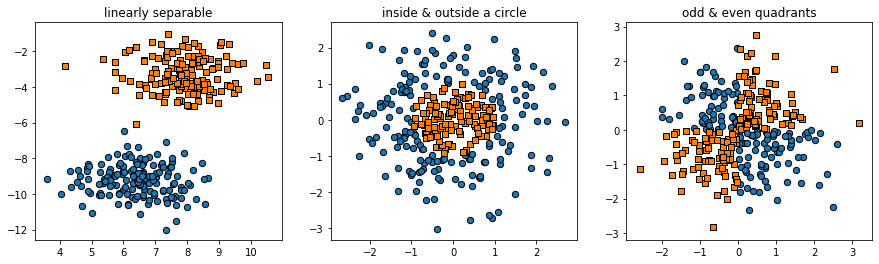

In [1]:
# Let us use sklearn library for SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# generate 300 separable points (with 2 center - binary classification problem first) 
X0, y0 = make_blobs(n_samples=300, centers=2, random_state=6)

# generate 300 separable points inside and outside a unit circle
np.random.seed(0)
Xc = np.random.randn(300, 2)
yc = Xc[:,0]**2 + Xc[:,1]**2 > 1

# generate 300 points separated in even and odd quadrants of the plane
Xq = np.random.randn(300, 2)
yq = np.logical_xor(Xq[:, 0] < 0, Xq[:, 1] < 0) # gives True if (false, true) & (true, false)
                                                # and False otherwise
# plot all the cases
X=[X0,Xc,Xq]
Y=[y0,yc,yq]
titles=["linearly separable","inside & outside a circle","odd & even quadrants" ]

plt.figure(figsize = (15,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(X[i][Y[i]>0,0],X[i][Y[i]>0,1],marker="o", edgecolors='black',s=40);
    plt.scatter(X[i][Y[i]<1,0],X[i][Y[i]<1,1],marker="s", edgecolors='black',s=40);
    plt.title(titles[i]);

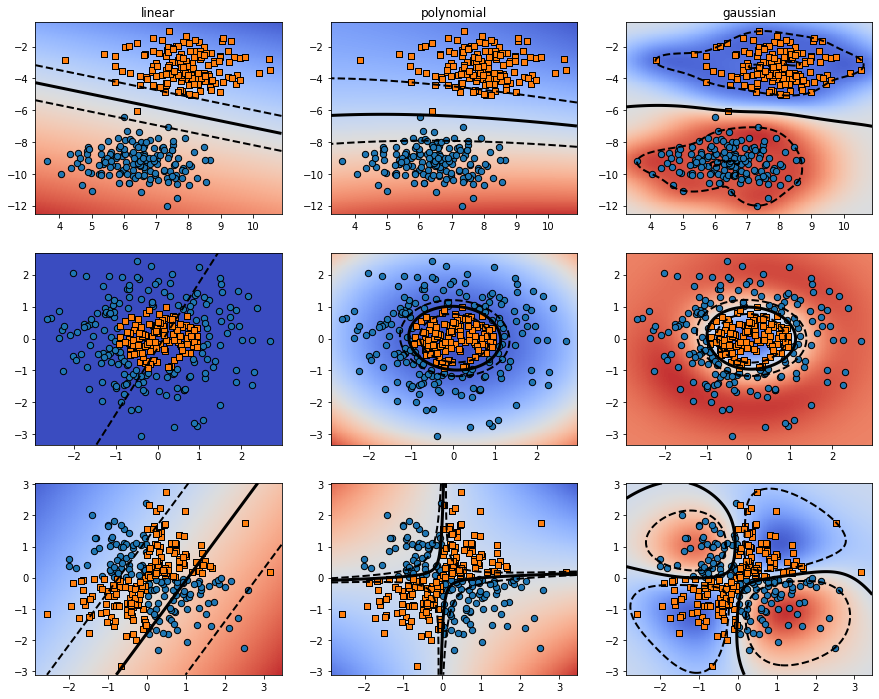

In [3]:
linear_svc = svm.SVC(kernel='linear', C=1) # simple linear kernel
poly_svc   = svm.SVC(kernel='poly', degree = 2, coef0 = .05, C=1) # polynomial kernel with d=3 
                                                                  # and the free parameter b=1 
rbf_svc    = svm.SVC(kernel='rbf', gamma=0.5, C=1) # gaussian kernel with gamma = 1/(2sigma^2) = 1

plt.figure(figsize = (15,12))
for j in range(3):
    x = X[j]
    y = Y[j]
    linear_svc.fit(x,y);
    poly_svc.fit(x,y);
    rbf_svc.fit(x,y);

    # create grid to evaluate model
    dx = abs(max(x[:,0])-min(x[:,0]))*0.05
    dy = abs(max(x[:,1])-min(x[:,1]))*0.05
    xlim = [min(x[:,0])-dx,max(x[:,0])+dx]
    ylim = [min(x[:,1])-dy,max(x[:,1])+dy]

    xx,yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200), np.linspace(ylim[0], ylim[1], 200))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T

    Zl = linear_svc.decision_function(xy).reshape(xx.shape)
    Zp = poly_svc.decision_function(xy).reshape(xx.shape)
    Zg = rbf_svc.decision_function(xy).reshape(xx.shape)
    Zs = [Zl,Zp,Zg]

    titles_svm = ["linear", "polynomial", "gaussian"]

    # plot decision boundary and margins
    for i in range(3):
        plt.subplot(3,3,i+1+j*3)

        plt.imshow( Zs[i], interpolation="nearest",
                    extent=(xlim[0],xlim[1] ,ylim[0] , ylim[1]),
                    aspect="auto", origin="lower",cmap="coolwarm")
        plt.clim( 1.1*np.min(Zs[i]),1.1*np.max(Zs[i]) )

        plt.contour(xx, yy, Zs[i], colors="black",  levels=[-1, 0, 1], alpha=1,
                    linestyles=["--", "-", "--"], linewidths=[2,3,2] );

        plt.scatter(x[y>0,0],x[y>0,1],marker="o", edgecolors='black',s=40);
        plt.scatter(x[y<1,0],x[y<1,1],marker="s", edgecolors='black',s=40);

        if j == 0:
            plt.title(titles_svm[i]);